# Graffiti complaints
## --- as a  social indicator in New York City

Author: Jianwei Li 

Github Link: https://github.com/jianweili0/PUI2018_jl9200/blob/master/EC_Project/EC_jl9200_GraffitiProject.ipynb

**Abstract**

A data science project to investigate the social factors about Graffiti Complaints from 311 calls in New York City and How the date of Graffiti complaint call and its cleaning duration change over time.


**Problem Description: **

Graffiti is one of the street-art expression forms of drawing, writing and even scripting. It is typically illegal because of it always companion with violation of property or action without consent. In New York City, you might encounter different genres of Graffiti, such as Hip-hop, Gangster, Politic and etc., which some of them are featured on social media on Instagram or Facebook. While the visitors are enjoying the vibe of street-art and shop owners are infuriating about those painting in front of their properties, the New York City did initiate a Graffiti Free NYC Program back into 1999, to provide free graffiti removal per requests from 311 calls. 

Based on the data I from NYPD graffiti complaints and 311 complaints about graffiti. I would like to see how its’ spatial trend over the year of 2015 to 2016, and its possible spatial correlation with income level and the crime rate. The idea is to plot the graffiti density as a heat map and overlay with the incidents’ location of five most frequent crime types in New York. Based on “ [__Broken Windows Theory__](https://en.wikipedia.org/wiki/Broken_windows_theory),” I will expect that the higher density of graffiti in the neighborhood will are positive relate to a higher crime rate, a higher young unemployment rate, and lower education level.



**Problem Motivation: **

There is an article, [__De Blasio Administration Not Pleased With Report Saying Anti-Graffiti Efforts Are Too Slow__](https://newyork.cbslocal.com/2016/09/08/de-blasio-anti-graffiti/),  from CBS New York in Dec 2016, mentioned that the average response time between complaint and cleanup grew from 67 days in 2013 to 114 days in 2016. However, the director from the Graffiti-Free NYC, Anthony Hogrebe, argued that the teams had cleaned up 6 million square feet in 2016 compared to 4.3 million in 2014. He also blamed that the increase of the response times is the graffitis at those difficult-to-reach places. In this case, I would imagine using 311 graffiti complaints as a proxy to build a model to predict the graffiti density of NYC, which ideally could help the Graffiti-Free NYC outreach team to deploy better strategies in different neighborhoods and reduce the cleaning response time.

# Data


1.puma data link:https://data.cityofnewyork.us/api/geospatial/cwiz-gcty?method=export&format=Shapefile

2.Graffiti data link: https://data.cityofnewyork.us/Social-Services/Graffiti-311-coimplaints/86yu-rdbf?defaultRender=richList

3.Crime data link by NYPD complaint: https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-Year-To-Date-/5uac-w243/data

4.311 data: https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9
(look into the complaint type related to the graffiti)
Unemployment rate in PUMA:  ACS census data 2016 5yr

5.Eduction Level(born in state with Bachelor Degree), Total Population (2016),Unemployment Rate of Female age of 16-64, Unemployment Rate of Male age of 16-64 and Total Unemployment rate of age over 16

I use Census API key to query the data from ACS census data 2012-2016 5yr https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_16_5YR_S1501&prodType=table

# Idea or Thought
1. I guess the more graffiti are spotted in the neighborhood, the lower education level and higher unemployment rate and higher crime complaints(what types are not specificed yet)
2. Also, We realize the duration of the graffiti process time is increase over the pass years. I am wondering if there are a seasonal trend for the cleaning duration

#### 1.  Download Graffiti data from 311 complaints request from 2010 to now

In [1]:

import numpy as np
import pandas as pd
import urllib
import requests
import geopandas as gpd
import shapely
import fiona
from fiona.crs import from_epsg
import os
from matplotlib import pyplot as plt
import seaborn  as sns
%matplotlib inline

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
os.system("mkdir data")

0

In [3]:
datadir = os.getcwd()+"/data";datadir

'/nfshome/jl9200/PUI2018_jl9200/EC_Project/data'

#### 1. Download Graffiti data from 311 Graffiti Complaints

In [4]:
## download the graffiti data from NYPD
url = "https://data.cityofnewyork.us/api/views/86yu-rdbf/rows.csv?accessType=DOWNLOAD"
filename = 'graffiti311.csv'
urllib.request.urlretrieve(url,filename)
graf = pd.read_csv(filename)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
graf.shape

(147363, 38)

In [6]:
# why graf.dropna(['LATITUDE','LONGITUDE'],axis = 1, inplace = True) not working
graf = graf[(~np.isnan(graf.Latitude))&(~np.isnan(graf.Longitude))]
graf = graf[(graf.Latitude!=0)&(graf.Longitude!=0)]

In [7]:
graf.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                        16914
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                             0
Location Type                      16937
Incident Zip                           1
Incident Address                     214
Street Name                          214
Cross Street 1                     59727
Cross Street 2                     59721
Intersection Street 1             142306
Intersection Street 2             142306
Address Type                           0
City                                   0
Landmark                          142518
Facility Type                     140821
Status                                 0
Due Date                           63550
Resolution Action Updated Date         0
Community Board                        0
Borough                                0
X Coordinate (St

* Notice that there are 16836 Nan value in Closed Date 

In [8]:
graf.shape

(142519, 38)

** _trying to understand for the data collection process_**

In [9]:
# Transfer Create Date using pd.to_datetime

In [10]:
graf['startdate'] = pd.to_datetime(graf['Created Date'])

In [11]:
graf['year'] = graf['startdate'].dt.year
graf['month'] = graf['startdate'].dt.month
graf['day'] = graf['startdate'].dt.day

In [12]:
graf.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,startdate,year,month,day
0,15636284,01/01/2010 04:39:20 PM,01/01/2010 04:39:20 PM,DSNY,Department of Sanitation,Graffiti,Graffiti,NaN,11215.0,194 12 STREET,...,NaN,NaN,NaN,40.668958,-73.991103,"(40.668958142504884, -73.99110341884311)",2010-01-01 16:39:20,2010,1,1
1,15636303,01/01/2010 05:26:37 PM,06/30/2010 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,10033.0,565 WEST 174 STREET,...,NaN,NaN,NaN,40.844448,-73.936215,"(40.84444801315609, -73.93621512605705)",2010-01-01 17:26:37,2010,1,1


In [13]:
grafCloseNAN = graf[graf['Closed Date'].isnull()]
grafCloseNAN[['year','Unique Key']].groupby('year',as_index = False).count()

,year,Unique Key
0,2010,572
1,2011,1281
2,2012,1742
3,2013,1133
4,2014,1190
5,2015,812
6,2016,632
7,2017,1833
8,2018,7719


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


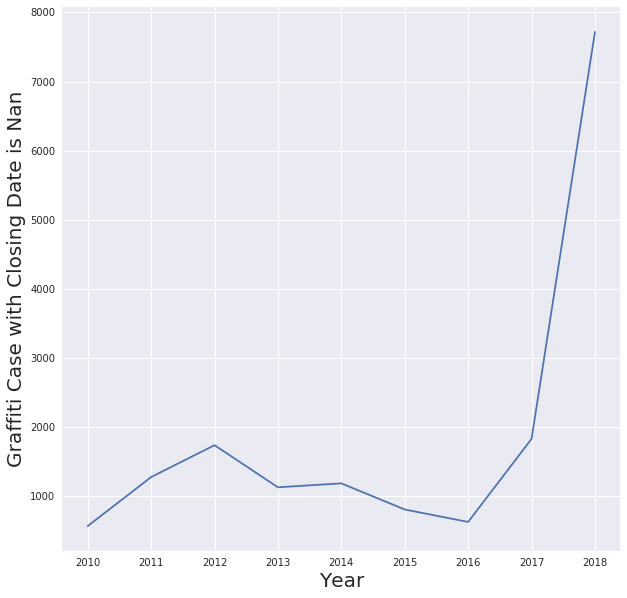

In [14]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.plot(grafCloseNAN[['year','Unique Key']].groupby('year',as_index = False).count()['year'],\
         grafCloseNAN[['year','Unique Key']].groupby('year',as_index = False).count()['Unique Key'])
ax.set_ylabel('Graffiti Case with Closing Date is Nan',fontsize = 20)
ax.set_xlabel('Year',fontsize = 20)
plt.show()

** Figure 1: We can see the in 2017 and 2018, the graffiti Cases with Nan in Closing data is rocketing.  But It decrease from after the De Blasio Administration start his term in 2014. However, we need to zoom into the dataset for more details**

In [15]:
# let's look into the Graffiti Case with the closing data
# graf= graf[~graf['Closed Date'].isnull()]

In [16]:
graf[['year','Unique Key']].groupby('year',as_index = False).count()

,year,Unique Key
0,2010,20334
1,2011,15855
2,2012,15441
3,2013,12942
4,2014,15533
5,2015,13222
6,2016,12296
7,2017,18608
8,2018,18288


In [17]:
# make lon and lat as float

In [18]:
graf['lonlat'] = list(zip(graf['Longitude'],graf['Latitude']))
graf['geometry'] = graf[['lonlat']].applymap(lambda x: shapely.geometry.Point(x))
graf = gpd.GeoDataFrame(graf)

In [19]:
graf.shape

(142519, 44)

In [20]:
# select the data for 2017 

In [21]:
graf2017 = graf[graf['year']==2017]

In [22]:
graf2017.shape

(18608, 44)

#### 2. Download PUMA DATA

In [23]:
#### Download the PUMA DATA
url = "https://data.cityofnewyork.us/api/geospatial/cwiz-gcty?method=export&format=GeoJSON"
filename = 'puma.geojson'
urllib.request.urlretrieve(url,filename)

('puma.geojson', <http.client.HTTPMessage at 0x7f57798a3320>)

In [24]:
pumadata = gpd.read_file(filename)

In [25]:
!ls

censusAPI.py  EC_jl9200_Graffiti.ipynb	puma.geojson
data	      graffiti311.csv		__pycache__


In [26]:
graf2017.crs =from_epsg(4326)

In [27]:
graf2017 = graf2017.to_crs(epsg = 2263)

In [28]:
graf2017.crs

{'init': 'epsg:2263', 'no_defs': True}

In [29]:
pumadata = pumadata.to_crs(epsg = 2263)

In [30]:
pumadata.crs

{'init': 'epsg:2263', 'no_defs': True}

In [31]:
graf2017['Location Type'] = graf2017['Location Type'].astype('str')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


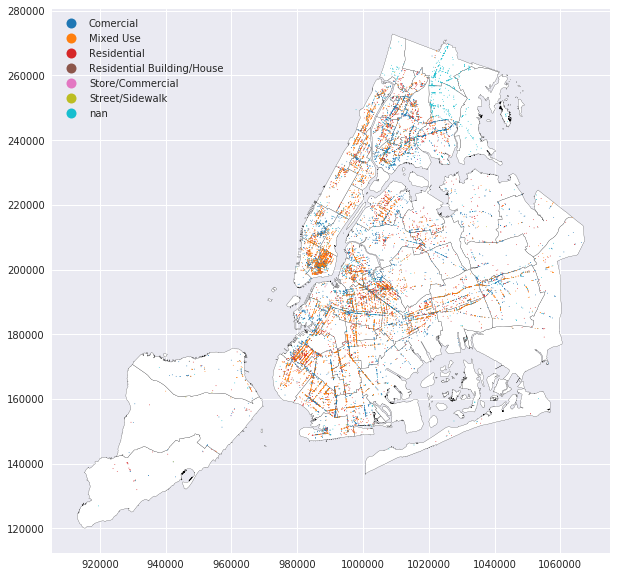

In [32]:
# first plot!
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

pumadata.plot(ax = ax, color = "white",edgecolor = "black",lw = 0.2)
graf2017.plot(ax = ax,markersize = 0.2,column = 'Location Type',legend = True)
ax.legend()

** Figure 2: This is the 311 Graffiti Complaints in 2017 in NYC with the legends indicate the location types**

#### 3. Download Unemployment data from Census API

In [33]:
import json
# look into the ACS 5yr data
# download 5 year census data 
url = "https://api.census.gov/data/2015/acs/acs5/variables.json"
resp = requests.request('GET',url)
aff5 = json.loads(resp.text)

In [34]:
aff5keys = list(aff5['variables'].keys())

In [35]:
len(aff5keys)

22807

In [36]:
aff5

{'variables': {'B27015_026E': {'attributes': 'B27015_026M,B27015_026MA,B27015_026EA',
   'concept': 'HEALTH INSURANCE COVERAGE STATUS AND TYPE BY HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS)',
   'group': 'B27015',
   'label': 'Estimate!!Total!!$100,000 or more!!No health insurance coverage',
   'limit': 0,
   'predicateType': 'int'},
  'B17001A_023E': {'attributes': 'B17001A_023M,B17001A_023MA,B17001A_023EA',
   'concept': 'POVERTY STATUS IN THE PAST 12 MONTHS BY SEX BY AGE (WHITE ALONE)',
   'group': 'B17001A',
   'label': 'Estimate!!Total!!Income in the past 12 months below poverty level!!Female!!16 and 17 years',
   'limit': 0,
   'predicateType': 'int'},
  'B20005_006E': {'attributes': 'B20005_006M,B20005_006MA,B20005_006EA',
   'concept': 'SEX BY WORK EXPERIENCE IN THE PAST 12 MONTHS BY EARNINGS IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS) FOR THE POPULATION 16 YEARS AND OVER',
   'group': 'B20005',
   'label': 'Estimate!!Total!!Male!!

Based on the json file I search the Umemployed and Find out the key start with "C23002"

Check the Census Reporter (for each "C23002")  https://censusreporter.org/tables/C23002A/

** Thus I will use Table C23002G: Sex by Age by Employment Status (Two or More Races) **

In [37]:
aff5['variables']['C23002G_001E']['label']

'Estimate!!Total'

In [38]:
[(k,aff5['variables'][k]['label']) for k in aff5keys if k.startswith("C23002G")\
and 'Unemployed' in aff5['variables'][k]['label']]

[('C23002G_013E',
  'Estimate!!Total!!Male!!65 years and over!!In labor force!!Unemployed'),
 ('C23002G_026E',
  'Estimate!!Total!!Female!!65 years and over!!In labor force!!Unemployed'),
 ('C23002G_008E',
  'Estimate!!Total!!Male!!16 to 64 years!!In labor force!!Civilian!!Unemployed'),
 ('C23002G_021E',
  'Estimate!!Total!!Female!!16 to 64 years!!In labor force!!Civilian!!Unemployed')]

** I choose Male and Female Unemployed in 16 to 64 years **
** and I also need the sum of total Unemployment rate in 16 to 64 years **

In [39]:
UnemployedMkey = 'C23002G_008E'
UnemployedFkey = 'C23002G_021E'
Totpopkey = 'C23002G_001E'
AllPopkey = 'B00001_001E'
EduKey = 'B06009_011E' # Born in state of residence!!Bachelor's degree 

In [40]:
from censusAPI import myAPI  # remember to delete 
import io


In [41]:
url = "https://api.census.gov/data/2015/acs/acs5?get="+EduKey+\
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" + myAPI

res = requests.request('GET',url)
Edu = pd.read_csv(io.StringIO(res.content.decode('utf-8').replace('[','').replace(']','')))
Edu = Edu.drop(['NAME','state','Unnamed: 4'],axis = 1)
Edu.columns = ['Edu','puma']
Edu.head(2)

,Edu,puma
0,5650,100
1,9619,200


In [42]:
url = "https://api.census.gov/data/2015/acs/acs5?get="+AllPopkey+\
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" + myAPI

res = requests.request('GET',url)
AllPop = pd.read_csv(io.StringIO(res.content.decode('utf-8').replace('[','').replace(']','')))
AllPop = AllPop.drop(['NAME','state','Unnamed: 4'],axis = 1)
AllPop.columns = ['Apop','puma']
AllPop.head(2)

,Apop,puma
0,15725,100
1,23140,200


In [43]:
url = "https://api.census.gov/data/2015/acs/acs5?get="+UnemployedMkey+\
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" + myAPI
res = requests.request('GET',url)
unemployedM = pd.read_csv(io.StringIO(res.content.decode('utf-8').replace("[","").replace("]","")))
unemployedM = unemployedM.drop(['NAME','state','Unnamed: 4'],axis = 1)
unemployedM.columns = ['unemployedM','puma']
unemployedM.head(2)

,unemployedM,puma
0,75,100
1,141,200


In [44]:
url = "https://api.census.gov/data/2015/acs/acs5?get="+UnemployedFkey+\
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" + myAPI
res = requests.request('GET',url)
unemployedF = pd.read_csv(io.StringIO(res.content.decode('utf-8').replace("[","").replace("]","")))
unemployedF = unemployedF.drop(['NAME','state','Unnamed: 4'],axis = 1)
unemployedF.columns = ['unemployedF','puma']
unemployedF.head(2)

,unemployedF,puma
0,79,100
1,74,200


In [45]:
url = "https://api.census.gov/data/2015/acs/acs5?get="+Totpopkey+\
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" + myAPI
res = requests.request('GET',url)
Totpop = pd.read_csv(io.StringIO(res.content.decode('utf-8').replace("[","").replace("]","")))
Totpop = Totpop.drop(['NAME','state','Unnamed: 4'],axis = 1)
Totpop.columns = ['UnemployedPop','puma']
Totpop.head()

,UnemployedPop,puma
0,1304,100
1,1782,200
2,1066,300
3,724,401
4,2476,402


** Merge all the unemployment data together and calculate the total unemployment rate for male female and total **

In [46]:
Unemployment = AllPop.merge(Totpop).merge(unemployedF).merge(unemployedM).merge(Edu)


In [47]:
Unemployment.head(2)

,Apop,puma,UnemployedPop,unemployedF,unemployedM,Edu
0,15725,100,1304,79,75,5650
1,23140,200,1782,74,141,9619


#### 4. Download Crime data from New York City Police Department (NYPD)

In [48]:
url = "https://data.cityofnewyork.us/api/views/5uac-w243/rows.csv?accessType=DOWNLOAD"
crime = pd.read_csv(url)

In [49]:
crime = crime.drop('Lat_Lon',axis = 1)

In [50]:
crime = crime[(~np.isnan(crime['Latitude']))&(~np.isnan(crime['Longitude']))]

In [51]:
crime = crime.dropna(subset=['OFNS_DESC'])

In [52]:
crime.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,457872064,113,QUEENS,06/30/2018,23:30:00,06/30/2018,23:40:00,COMPLETED,NaN,NaN,...,BLACK,M,NaN,18-24,BLACK,F,1048111.0,188479.0,40.683786,-73.769746
1,271939965,115,QUEENS,06/30/2018,23:20:00,06/30/2018,23:25:00,COMPLETED,NaN,NaN,...,WHITE HISPANIC,M,NaN,18-24,ASIAN/PAC.ISL,M,1017940.0,214837.0,40.756298,-73.878397
2,862644726,94,BROOKLYN,06/30/2018,23:09:00,06/30/2018,23:25:00,COMPLETED,NaN,NaN,...,BLACK,M,NaN,45-64,ASIAN/PAC.ISL,M,997245.0,204130.0,40.726965,-73.953117
3,354814756,41,BRONX,06/30/2018,23:00:00,06/30/2018,23:19:00,COMPLETED,NaN,NaN,...,BLACK,M,NaN,UNKNOWN,UNKNOWN,E,1012522.0,239685.0,40.824519,-73.897849
4,963900505,43,BRONX,06/30/2018,23:00:00,06/30/2018,23:29:00,COMPLETED,MONROE,911.0,...,WHITE HISPANIC,M,NaN,18-24,WHITE HISPANIC,F,1021060.0,238980.0,40.822552,-73.867003


In [53]:
crime.columns

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT',
       'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD',
       'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_CD',
       'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'STATION_NAME', 'SUSP_AGE_GROUP',
       'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_AGE_GROUP',
       'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude'],
      dtype='object')

In [54]:
crime.isnull().sum()

CMPLNT_NUM                0
ADDR_PCT_CD               0
BORO_NM                 150
CMPLNT_FR_DT              0
CMPLNT_FR_TM              0
CMPLNT_TO_DT          33581
CMPLNT_TO_TM          33452
CRM_ATPT_CPTD_CD          0
HADEVELOPT           217227
HOUSING_PSA          211212
JURISDICTION_CODE       148
JURIS_DESC                0
KY_CD                     0
LAW_CAT_CD                0
LOC_OF_OCCUR_DESC     41592
OFNS_DESC                 0
PARKS_NM             227192
PATROL_BORO             148
PD_CD                   148
PD_DESC                 148
PREM_TYP_DESC           987
RPT_DT                    0
STATION_NAME         222833
SUSP_AGE_GROUP        58222
SUSP_RACE             58210
SUSP_SEX              58210
TRANSIT_DISTRICT     222833
VIC_AGE_GROUP             0
VIC_RACE                  0
VIC_SEX                   0
X_COORD_CD                0
Y_COORD_CD                0
Latitude                  0
Longitude                 0
dtype: int64

In [55]:
len(crime['OFNS_DESC'].unique())

57

** For the Crime data, I select those related to Burglary and Theft **

In [56]:
selCrimeTypes = ["BURGLAR'S TOOLS","BURGLARY","GRAND LARCENY","GRAND LARCENY OF MOTOR VEHICLE",\
                 "PETIT LARCENY","POSSESSION OF STOLEN PROPERTY","ROBBERY"]

In [57]:
crime[['OFNS_DESC','CMPLNT_NUM']].groupby('OFNS_DESC').count()

,CMPLNT_NUM
OFNS_DESC,
ABORTION,1
ADMINISTRATIVE CODE,479
AGRICULTURE & MRKTS LAW-UNCLASSIFIED,61
ALCOHOLIC BEVERAGE CONTROL LAW,43
ANTICIPATORY OFFENSES,2
ARSON,371
ASSAULT 3 & RELATED OFFENSES,26453
BURGLAR'S TOOLS,159
BURGLARY,5504


In [58]:
# sorted(crime['OFNS_DESC'].unique())

In [59]:
# use df[df['A'].isin(valuelist)]
# reference: https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe

In [60]:
crimedata = crime[crime['OFNS_DESC'].isin(selCrimeTypes)].reset_index()

In [61]:
crimedata.head(2)

,index,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,...,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,7,963520368,42,BRONX,06/30/2018,22:55:00,06/30/2018,22:58:00,COMPLETED,NaN,...,BLACK,M,NaN,18-24,BLACK,F,1012860.0,244801.0,40.838559,-73.896606
1,10,585148547,28,MANHATTAN,06/30/2018,22:50:00,06/30/2018,23:00:00,COMPLETED,NaN,...,BLACK,F,NaN,UNKNOWN,UNKNOWN,D,999002.0,230857.0,40.800321,-73.946719


In [62]:
crimedata.shape

(76875, 35)

In [63]:
crimedata['lonlat'] = list(zip(crimedata['Longitude'],crimedata['Latitude']))
crimedata['geometry'] = crimedata[['lonlat']].applymap(lambda x: shapely.geometry.Point(x))
crimedata = gpd.GeoDataFrame(crimedata)
crimedata.crs = from_epsg(4326)
crimedata=crimedata.to_crs(epsg = 2263)
crimedata.head(2)

,index,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,lonlat,geometry
0,7,963520368,42,BRONX,06/30/2018,22:55:00,06/30/2018,22:58:00,COMPLETED,NaN,...,NaN,18-24,BLACK,F,1012860.0,244801.0,40.838559,-73.896606,"(-73.896605923, 40.838559364)",POINT (1012859.603194975 244804.0181131161)
1,10,585148547,28,MANHATTAN,06/30/2018,22:50:00,06/30/2018,23:00:00,COMPLETED,NaN,...,NaN,UNKNOWN,UNKNOWN,D,999002.0,230857.0,40.800321,-73.946719,"(-73.946718878, 40.800321033)",POINT (999001.6010110233 230860.0149029614)


In [64]:
# Also I select a subset of 2017 crimedata to compare the 2017 crimedata

In [65]:
crimedata['year'] = [int(crimedata['CMPLNT_FR_DT'][i].split('/')[-1]) for i in range(len(crimedata['CMPLNT_FR_DT']))]

In [66]:
crime2017 = crimedata[crimedata['year']==2017]

#### 5.Data Wrangling

** _Try to spatial join the graffiti spot on the censustract_ **

In [67]:
pumadata.head(1)

,puma,shape_area,shape_leng,geometry
0,3701,97928517.7258,53227.1444612,(POLYGON ((1012885.033996583 268830.4841918442...


In [68]:
graf.head(1)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Segment,Latitude,Longitude,Location,startdate,year,month,day,lonlat,geometry
0,15636284,01/01/2010 04:39:20 PM,01/01/2010 04:39:20 PM,DSNY,Department of Sanitation,Graffiti,Graffiti,NaN,11215.0,194 12 STREET,...,NaN,40.668958,-73.991103,"(40.668958142504884, -73.99110341884311)",2010-01-01 16:39:20,2010,1,1,"(-73.9911034188, 40.6689581425)",POINT (-73.99110341884311 40.66895814250488)


In [69]:
graf2017.crs

{'init': 'epsg:2263', 'no_defs': True}

In [70]:
pumadata.crs

{'init': 'epsg:2263', 'no_defs': True}

In [71]:
grafjoin = gpd.sjoin(graf2017,pumadata,op='within')

In [72]:
grafjoin.shape

(18605, 48)

In [73]:
grafjoin.head(1)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,startdate,year,month,day,lonlat,geometry,index_right,puma,shape_area,shape_leng
90055,35813619,03/28/2017 09:41:27 AM,05/22/2017 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Residential,10468.0,2761 UNIVERSITY AVENUE,...,2017-03-28 09:41:27,2017,3,28,"(-73.8995994734, 40.8703484128)",POINT (1012017.999983449 256385.0144381144),0,3701,97928517.7258,53227.1444612


In [74]:
grafcount = grafjoin[['index_right','puma']].groupby('puma',as_index = False).count()
grafcount.columns = ['puma','grafCount']

In [75]:
grafcount.head()

,puma,grafCount
0,3701,96
1,3702,220
2,3703,66
3,3704,211
4,3705,539


In [76]:
crime.head(2)

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,457872064,113,QUEENS,06/30/2018,23:30:00,06/30/2018,23:40:00,COMPLETED,NaN,NaN,...,BLACK,M,NaN,18-24,BLACK,F,1048111.0,188479.0,40.683786,-73.769746
1,271939965,115,QUEENS,06/30/2018,23:20:00,06/30/2018,23:25:00,COMPLETED,NaN,NaN,...,WHITE HISPANIC,M,NaN,18-24,ASIAN/PAC.ISL,M,1017940.0,214837.0,40.756298,-73.878397


#### 6.Visualization

In [77]:
# reference: http://nbviewer.jupyter.org/gist/perrygeo/c426355e40037c452434
from scipy import ndimage
def heatmap(d, bins=(100,100),smoothing = 1.5,cmap = 'jet'):
    def getx(pt):
        return pt.coords[0][0]
    def gety(pt):
        return pt.coords[0][1]
    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()



/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


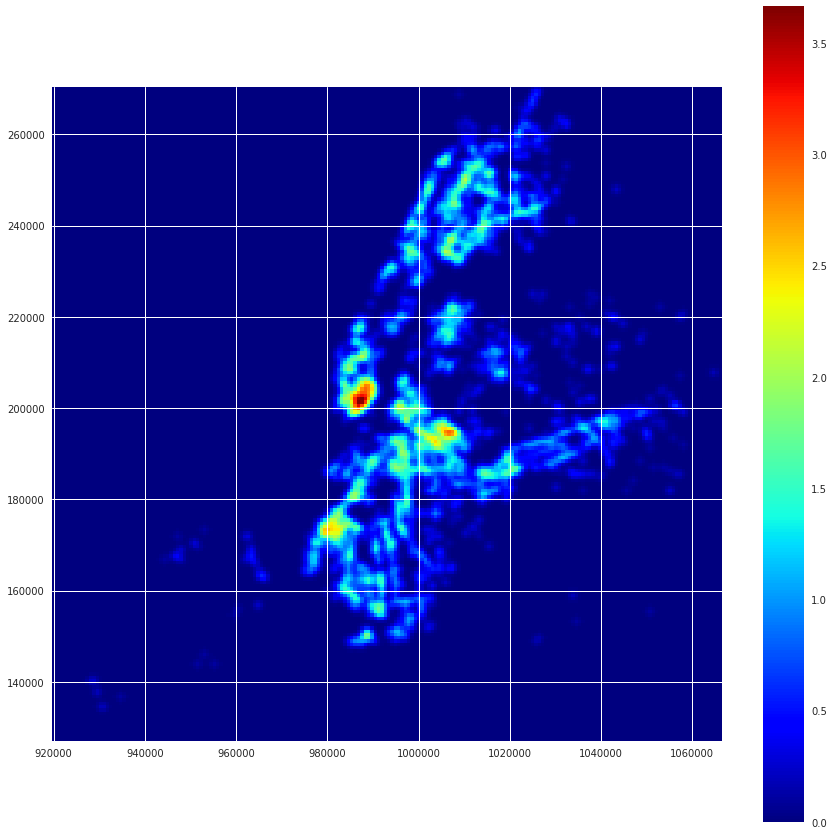

In [78]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)
heatmap(graf2017,bins=200,smoothing=1)

** Figure 3-1: 
This heatmap show the density of 311 Graffiti Counts in 2017, The red represent the highest concentration of the graffiti complaints number, while the dark blue is the lowest.**

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


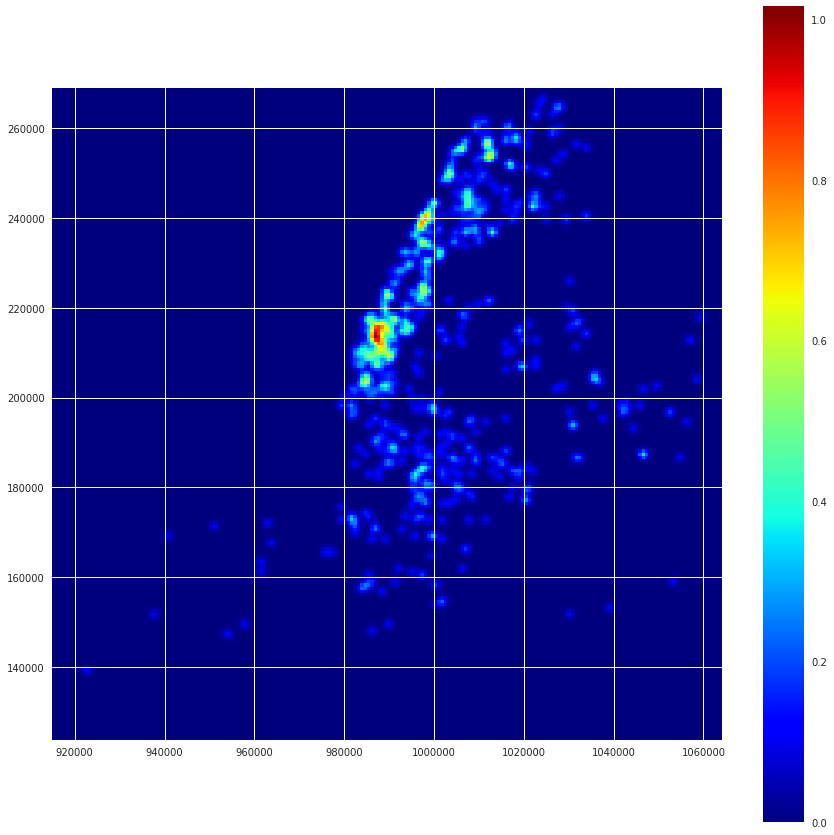

In [79]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)
heatmap(crime2017,bins=200,smoothing=1)

** Figure 3-2: 
This heatmap show the density of 311 Crime data related to Bulgury and Theft in 2017, The red represent the highest concentration of the graffiti complaints number, while the dark blue is the lowest.**

** From the heatmap we can identify similar location is at midtown Manhattan and downtown Brooklyn area **

In [80]:
# Spatial join and DataWrangling

** _Try to spatial join the crime data spot on the pumadata_ **

In [81]:
crimedata.crs

{'init': 'epsg:2263', 'no_defs': True}

In [82]:
crimejoin = gpd.sjoin(crimedata,pumadata,op = 'within')

In [83]:
crimecount = crimejoin[['index','puma']].groupby('puma',as_index = False).count()
crimecount.columns = ['puma','crimeCount']

In [84]:
crimecount.head(2)

,puma,crimeCount
0,3701,832
1,3702,1251


In [85]:
grafcrim = grafcount.merge(crimecount)

In [86]:
grafcrim.head()

,puma,grafCount,crimeCount
0,3701,96,832
1,3702,220,1251
2,3703,66,890
3,3704,211,891
4,3705,539,2009


In [87]:
Unemployment['puma'] = Unemployment['puma'].astype(str)

In [88]:
grafcrim['puma'] = grafcrim['puma'].astype(str)

In [89]:
pumashp = pumadata.reset_index()[['puma','geometry']]

In [90]:
df = pumashp.merge(grafcrim).merge(Unemployment)

In [91]:
df.head()

,puma,geometry,grafCount,crimeCount,Apop,UnemployedPop,unemployedF,unemployedM,Edu
0,3701,(POLYGON ((1012885.033996583 268830.4841918442...,96,832,7548,3240,263,103,6671
1,3702,(POLYGON ((1027331.841796877 256069.2766112776...,220,1251,10313,2684,104,171,5532
2,3703,(POLYGON ((1042822.450195312 243439.8142089319...,66,890,6462,3538,91,142,8470
3,3704,(POLYGON ((1026308.769592285 256767.6972045382...,211,891,10184,3041,165,106,5448
4,4015,(POLYGON ((997086.4570312516 171933.9880370507...,378,878,12580,2235,166,69,7951


In [92]:
df['Apop'].sum()

595196

In [93]:
df.isnull().sum()

puma             0
geometry         0
grafCount        0
crimeCount       0
Apop             0
UnemployedPop    0
unemployedF      0
unemployedM      0
Edu              0
dtype: int64

In [94]:
# copy a dataset so I can devide all other columns except the crafCount  with Apop (Total population from ACS)

In [95]:
df_s = df[:]

In [96]:
df.head()

,puma,geometry,grafCount,crimeCount,Apop,UnemployedPop,unemployedF,unemployedM,Edu
0,3701,(POLYGON ((1012885.033996583 268830.4841918442...,96,832,7548,3240,263,103,6671
1,3702,(POLYGON ((1027331.841796877 256069.2766112776...,220,1251,10313,2684,104,171,5532
2,3703,(POLYGON ((1042822.450195312 243439.8142089319...,66,890,6462,3538,91,142,8470
3,3704,(POLYGON ((1026308.769592285 256767.6972045382...,211,891,10184,3041,165,106,5448
4,4015,(POLYGON ((997086.4570312516 171933.9880370507...,378,878,12580,2235,166,69,7951


In [97]:
df_s['crimeCount'] =df_s['crimeCount']/df_s['Apop']
df_s['unemployedF'] =df_s['unemployedF']/df_s['Apop']
df_s['unemployedM'] =df_s['unemployedM']/df_s['Apop']
df_s['Edu'] =df_s['Edu']/df_s['Apop']
df_s['UnemployedPop'] =df_s['UnemployedPop']/df_s['Apop']

In [98]:
df.crs

{'init': 'epsg:2263', 'no_defs': True}

In [99]:
df_s.head()

,puma,geometry,grafCount,crimeCount,Apop,UnemployedPop,unemployedF,unemployedM,Edu
0,3701,(POLYGON ((1012885.033996583 268830.4841918442...,96,0.110228,7548,0.429253,0.034844,0.013646,0.883810
1,3702,(POLYGON ((1027331.841796877 256069.2766112776...,220,0.121303,10313,0.260254,0.010084,0.016581,0.536410
2,3703,(POLYGON ((1042822.450195312 243439.8142089319...,66,0.137728,6462,0.547509,0.014082,0.021975,1.310740
3,3704,(POLYGON ((1026308.769592285 256767.6972045382...,211,0.087490,10184,0.298606,0.016202,0.010408,0.534957
4,4015,(POLYGON ((997086.4570312516 171933.9880370507...,378,0.069793,12580,0.177663,0.013196,0.005485,0.632035


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


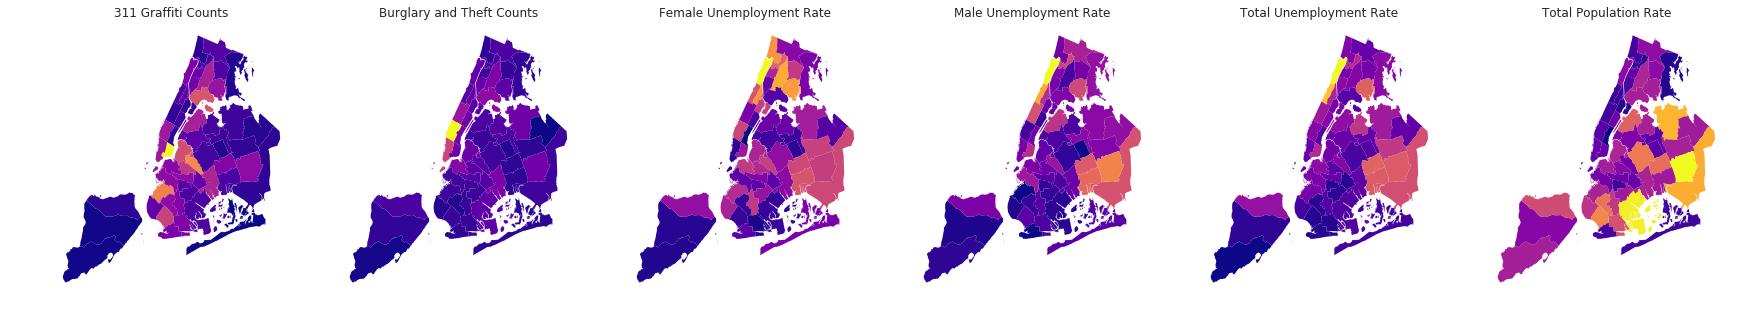

In [100]:
# Trying to plot grafCount, crimeCount, unemployedF,unemployedM and unemployedAll
fig = plt.figure(figsize = (30,5))
ax1 = fig.add_subplot(161)
df.plot(column ='grafCount',ax = ax1,label = True,cmap = 'plasma')
ax1.axis('off')
ax1.set_title(r'311 Graffiti Counts')

ax2 = fig.add_subplot(162)
df.plot(column = 'crimeCount',ax = ax2,label = True,cmap = 'plasma')
ax2.axis('off')
ax2.set_title(r'Burglary and Theft Counts')

ax3 = fig.add_subplot(163)
df.plot(column = 'unemployedF',ax = ax3,label = True,cmap = 'plasma')
ax3.axis('off')
ax3.set_title(r'Female Unemployment Rate')

ax4 = fig.add_subplot(164)
df.plot(column = 'unemployedM',ax = ax4,label = True,cmap = 'plasma')
ax4.axis('off')
ax4.set_title(r'Male Unemployment Rate')


ax5 = fig.add_subplot(165)
df.plot(column = 'UnemployedPop',ax = ax5,label = True,cmap = 'plasma')
ax5.axis('off')
ax5.set_title(r'Total Unemployment Rate')

ax6 = fig.add_subplot(166)
df.plot(column = 'Apop',ax = ax6,label = True,cmap = 'plasma')
ax6.axis('off')
ax6.set_title(r'Total Population Rate')

plt.show()

** Figure 3-3: These plots show the distribution of 311 Graffiti Counts, Crime data about the Buglary Theft, Female and male unemployment Total Unemploymentrate and total populatoin rate. Yellow represent the higest values for each plot. purple to the lowest.**

In [101]:
df.columns

Index(['puma', 'geometry', 'grafCount', 'crimeCount', 'Apop', 'UnemployedPop',
       'unemployedF', 'unemployedM', 'Edu'],
      dtype='object')

#### 7.Analysis

1. I will like to use the Crime Count relate to Bulgury Education level and Unemployment to predict the Number of the GraffitiCount 
2. I will look into the Graffiti cleaning duration over the the pass 8 years to see if there are any seasonal trend

#### Part1

#### Run Ordinal Least Square Model

In [102]:
import statsmodels.api as sm
import scipy.stats

import statsmodels.formula.api as smf

In [103]:
df_columns = ['crimeCount','Apop','unemployedF','unemployedM','UnemployedPop','Edu']
modOLS = sm.OLS(df.grafCount,sm.add_constant(df.loc[:,df_columns]),missing = 'drop').fit()
print(modOLS.summary())

                            OLS Regression Results                            
Dep. Variable:              grafCount   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     1.521
Date:                Fri, 14 Dec 2018   Prob (F-statistic):              0.192
Time:                        02:07:01   Log-Likelihood:                -381.71
No. Observations:                  55   AIC:                             777.4
Df Residuals:                      48   BIC:                             791.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const           197.6124    159.221      1.241

** Interpretation: The OLS model show that the crime rate's P-values is less than 0.05, but other variable I cannot reject the possibility.**

In [104]:
df_norm = df[:]

In [105]:
df_norm.columns[3:]

Index(['crimeCount', 'Apop', 'UnemployedPop', 'unemployedF', 'unemployedM',
       'Edu'],
      dtype='object')

In [106]:
for i in df_norm.columns[3:]:

    df_norm[i] = df_norm[i]/df_norm['Apop']

In [107]:
df_norm.head()

,puma,geometry,grafCount,crimeCount,Apop,UnemployedPop,unemployedF,unemployedM,Edu
0,3701,(POLYGON ((1012885.033996583 268830.4841918442...,96,0.110228,1.0,3240.0,263.0,103.0,6671.0
1,3702,(POLYGON ((1027331.841796877 256069.2766112776...,220,0.121303,1.0,2684.0,104.0,171.0,5532.0
2,3703,(POLYGON ((1042822.450195312 243439.8142089319...,66,0.137728,1.0,3538.0,91.0,142.0,8470.0
3,3704,(POLYGON ((1026308.769592285 256767.6972045382...,211,0.087490,1.0,3041.0,165.0,106.0,5448.0
4,4015,(POLYGON ((997086.4570312516 171933.9880370507...,378,0.069793,1.0,2235.0,166.0,69.0,7951.0


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


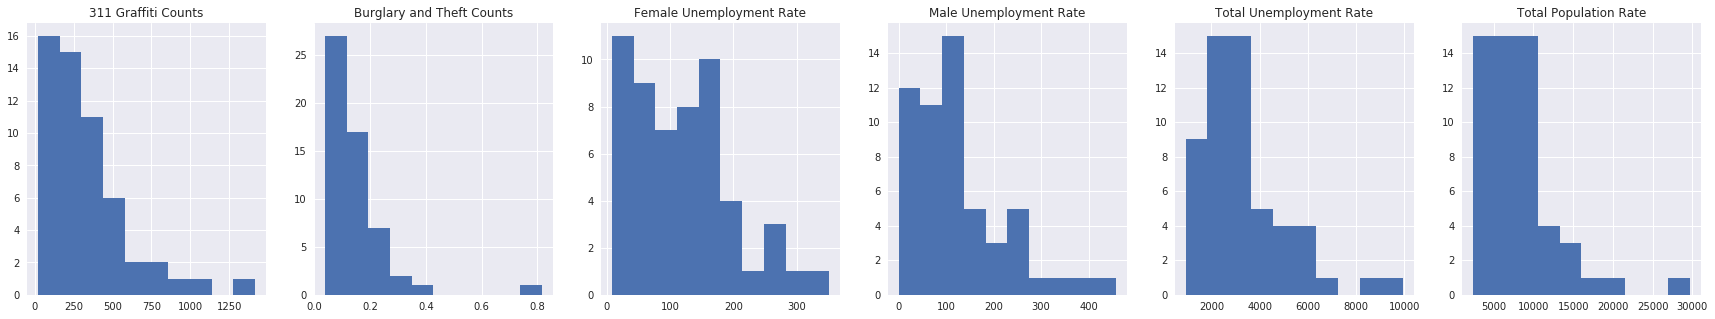

In [108]:
# Trying to plot hist grafCount, crimeCount, unemployedF,unemployedM and unemployedAll
fig = plt.figure(figsize = (30,5))
ax1 = fig.add_subplot(161)
df_norm.grafCount.hist(ax = ax1)

ax1.set_title(r'311 Graffiti Counts')

ax2 = fig.add_subplot(162)
df_norm.crimeCount.hist(ax = ax2)

ax2.set_title(r'Burglary and Theft Counts')

ax3 = fig.add_subplot(163)
df_norm.unemployedF.hist(ax = ax3)

ax3.set_title(r'Female Unemployment Rate')

ax4 = fig.add_subplot(164)
df_norm.unemployedM.hist(ax = ax4)

ax4.set_title(r'Male Unemployment Rate')


ax5 = fig.add_subplot(165)
df_norm.UnemployedPop.hist(ax = ax5)

ax5.set_title(r'Total Unemployment Rate')

ax6 = fig.add_subplot(166)
df_norm.Edu.hist(ax = ax6)

ax6.set_title(r'Total Population Rate')


plt.show()

** Figure 4:These plots show the histogram distribution of 311 Graffiti Counts, Crime data about the Buglary Theft, Female and male unemployment Total Unemploymentrate and total populatoin. From the first glance, it is indistinguishable from Gaussians distribution, Thus we need to try the KS test and pearsonr test. **

**Note** 
I will like to know if these varaibles are Gaussian Distribution 
this can be answered with a KS test, in which case the data has to be standardized, or with an Anderson Darling test.
### KS test
for the Graffiti Count and UnemployedM

In [109]:
df.columns

Index(['puma', 'geometry', 'grafCount', 'crimeCount', 'Apop', 'UnemployedPop',
       'unemployedF', 'unemployedM', 'Edu'],
      dtype='object')

In [110]:
alpha = 0.05

In [111]:
import scipy as sp

print ("For Graffiti Count")
p = sp.stats.kstest((df.grafCount - df.grafCount.mean())/
                df.grafCount.std(), "norm")[1]

if p > alpha:
    print("the Null hypothesis that the samples are drawn from a Gaussian distribution cannot be rejected")
else: 
    print("we reject the Null hypothesis that the samples are drawn from a Gaussian distribution at a p-value of", alpha)

For Graffiti Count
the Null hypothesis that the samples are drawn from a Gaussian distribution cannot be rejected


In [112]:
print ("For Male Unemployment within 16-65 Fraction")
p = sp.stats.kstest((df.unemployedM - df.unemployedM.mean())/
                df.unemployedM.std(), "norm")[1]

if p > alpha:
    print("the Null hypothesis that the samples are drawn from a Gaussian distribution cannot be rejected")
else: 
    print("we reject the Null hypothesis that the samples are drawn from a Gaussian distribution at a p-value of", alpha)

For Male Unemployment within 16-65 Fraction
the Null hypothesis that the samples are drawn from a Gaussian distribution cannot be rejected


** Conclusion of KStest**

We cannot see statistical significant differences between these two distribution and the Gaussian distribution.

In [113]:
scipy.stats.pearsonr(df.grafCount,df.crimeCount)

(0.24857416138718288, 0.067254061569650553)

In [114]:
scipy.stats.pearsonr(df.grafCount,df.unemployedM)

(0.03723385510057374, 0.78724891746172254)

In [115]:
scipy.stats.pearsonr(df.grafCount,df.unemployedF)

(0.12543733974131979, 0.36149909836772054)

In [116]:
scipy.stats.pearsonr(df_norm.grafCount,df_norm.UnemployedPop)

(0.027098481136002581, 0.84430670773033767)

In [117]:
scipy.stats.pearsonr(df_norm.grafCount,df_norm.Edu)

(-0.17834648593532051, 0.19266150284921635)

** Conclusion ** 

Based on the Pearsonr test, the GrafCount and CrimeCount have a weak positive correlation, but the p-value is just a little big higher than 0.05,which mean that we cannot reject the result. the GrafCount and  Education also have a week negative correlation

In [118]:
# Let's also take Total population into account for this model

In [119]:
selcols = df_norm.columns[3:];selcols

Index(['crimeCount', 'Apop', 'UnemployedPop', 'unemployedF', 'unemployedM',
       'Edu'],
      dtype='object')

In [120]:
cols = selcols[0] + ' + '
for i in range(1,len(selcols)):
    cols = cols + selcols[i]
    if i <(len(selcols)-1):
        cols = cols + ' + '
    else:
        continue
formula = 'grafCount~' + cols

In [121]:
formula

'grafCount~crimeCount + Apop + UnemployedPop + unemployedF + unemployedM + Edu'

In [122]:
modOLS_N1 = smf.ols(formula = formula, data = df_norm).fit()

In [123]:
print(modOLS_N1.summary())

                            OLS Regression Results                            
Dep. Variable:              grafCount   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.8652
Date:                Fri, 14 Dec 2018   Prob (F-statistic):              0.511
Time:                        02:07:02   Log-Likelihood:                -384.17
No. Observations:                  55   AIC:                             780.3
Df Residuals:                      49   BIC:                             792.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept       180.6756     55.087      3.280

In [124]:
# df_columns = ['crimeCount','unemployedF','unemployedM','UnemployedPop','Edu']
# modOLS_N = sm.OLS(df_norm.grafCount,sm.add_constant(df_norm.loc[:,df_columns]),missing = 'drop').fit()
# print(modOLS_N.summary())

In [125]:
df_norm.head()

,puma,geometry,grafCount,crimeCount,Apop,UnemployedPop,unemployedF,unemployedM,Edu
0,3701,(POLYGON ((1012885.033996583 268830.4841918442...,96,0.110228,1.0,3240.0,263.0,103.0,6671.0
1,3702,(POLYGON ((1027331.841796877 256069.2766112776...,220,0.121303,1.0,2684.0,104.0,171.0,5532.0
2,3703,(POLYGON ((1042822.450195312 243439.8142089319...,66,0.137728,1.0,3538.0,91.0,142.0,8470.0
3,3704,(POLYGON ((1026308.769592285 256767.6972045382...,211,0.087490,1.0,3041.0,165.0,106.0,5448.0
4,4015,(POLYGON ((997086.4570312516 171933.9880370507...,378,0.069793,1.0,2235.0,166.0,69.0,7951.0


** Based on the ols test above, I will try to visualize the CrimeCount, UnemployedPop, UnemployedF, UnemployedM **

Text(0.5,0,'crimeCount')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


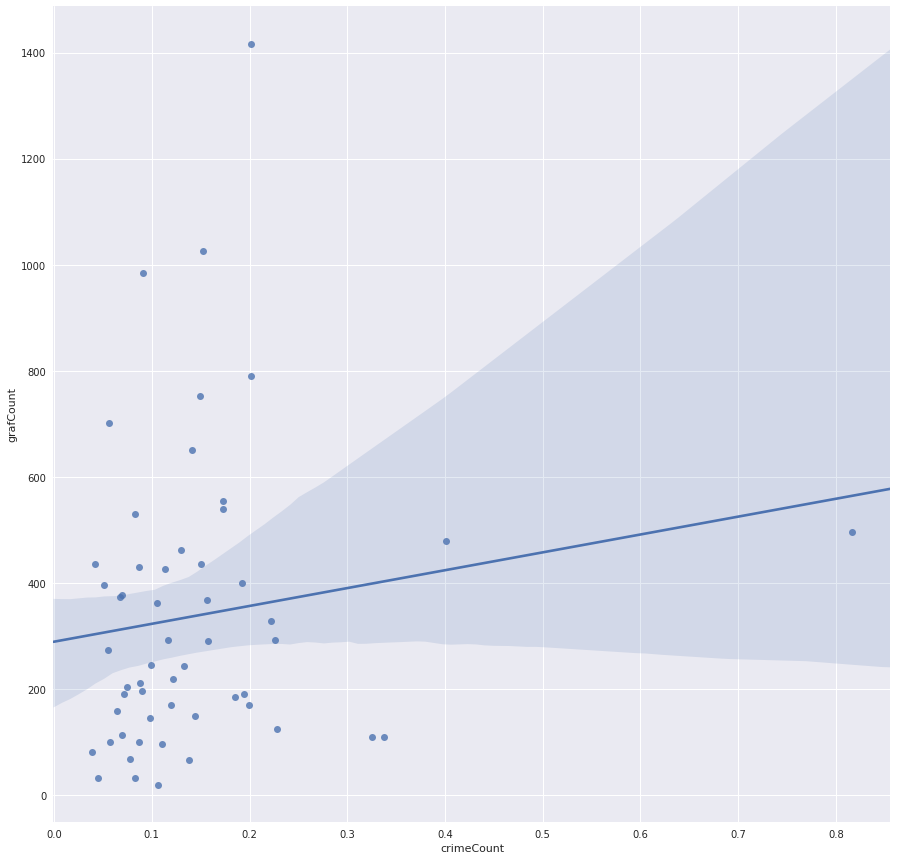

In [126]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)

sns.regplot(x="crimeCount", y="grafCount", data=df_norm,ax = ax);

ax.set_ylabel("grafCount")
ax.set_xlabel("crimeCount")

** Figure 5-1: These plots show the ols fit model with grafCount and crimeCount, which we didn't see significant positive result .**

Text(0.5,0,'Female Unemployment of Age 16-64')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


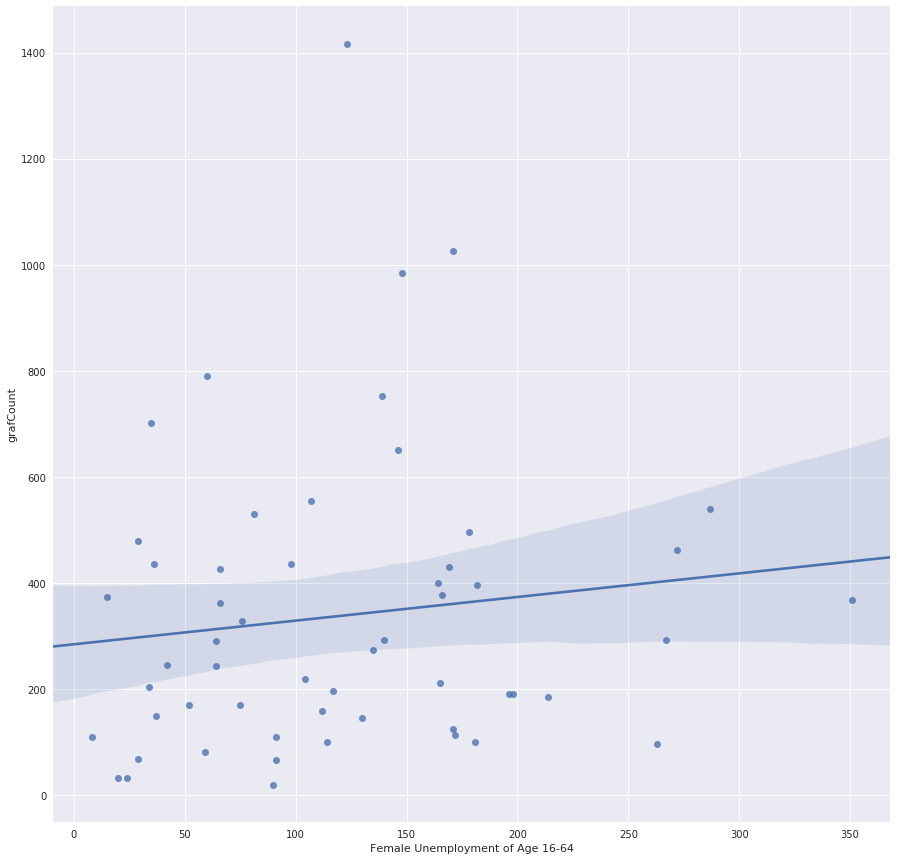

In [127]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)

sns.regplot(x="unemployedF", y="grafCount", data=df_norm,ax = ax);

ax.set_ylabel("grafCount")
ax.set_xlabel("Female Unemployment of Age 16-64")

** Figure 5-2: These plots show the ols fit model with grafCount and Female Unemployment, which we didn't see significant positive result .**

Text(0.5,0,'Male Unemployment of Age 16-64')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


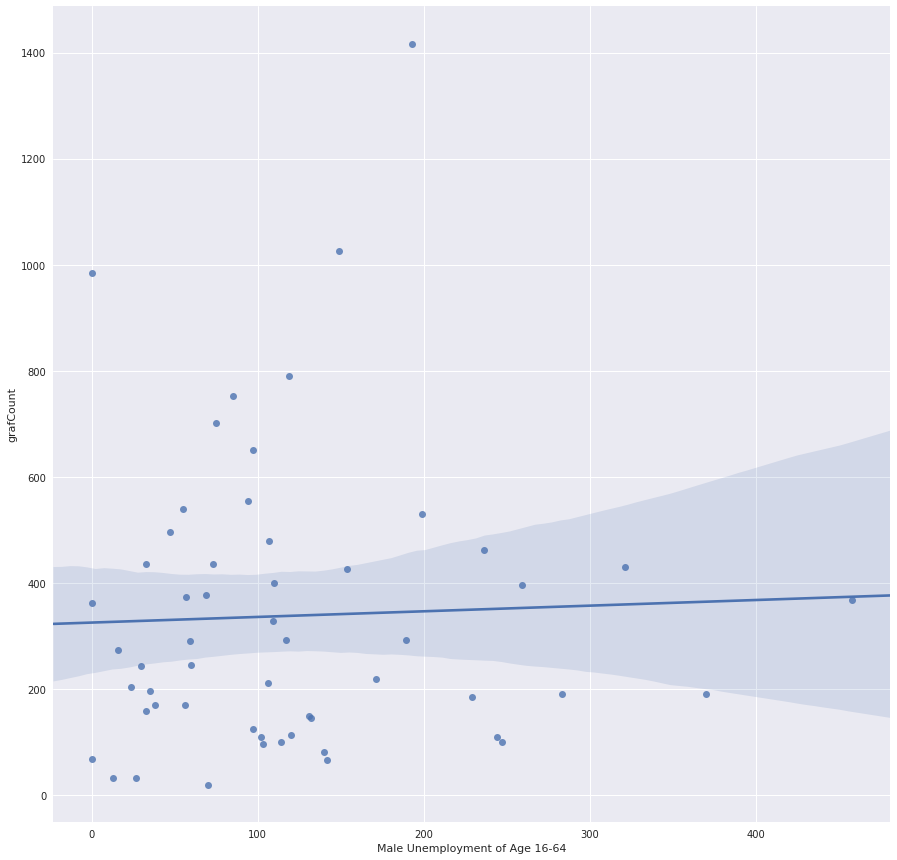

In [128]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)

sns.regplot(x="unemployedM", y="grafCount", data=df_norm,ax = ax);

ax.set_ylabel("grafCount")
ax.set_xlabel("Male Unemployment of Age 16-64")

** Figure 5-3: These plots show the ols fit model with grafCount and Male Unemployment, which we didn't see significant negative result .**

Text(0.5,0,'Total Unemployment of Age over 16')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


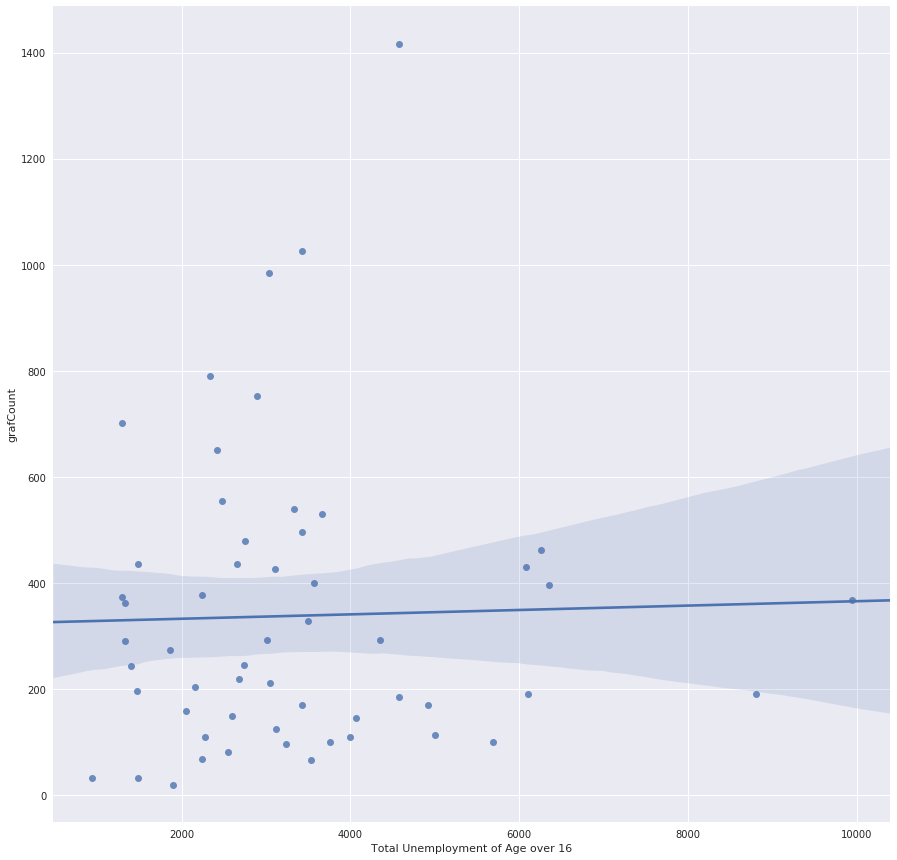

In [129]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)

sns.regplot(x="UnemployedPop", y="grafCount", data=df_norm,ax = ax);

ax.set_ylabel("grafCount")
ax.set_xlabel("Total Unemployment of Age over 16")

** Figure 5-4: These plots show the ols fit model with grafCount and total Unemployment of age over 16 , which we didn't see significant negative result .**

Text(0.5,0,'Education (Bron in State with Bachelor Degree)')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


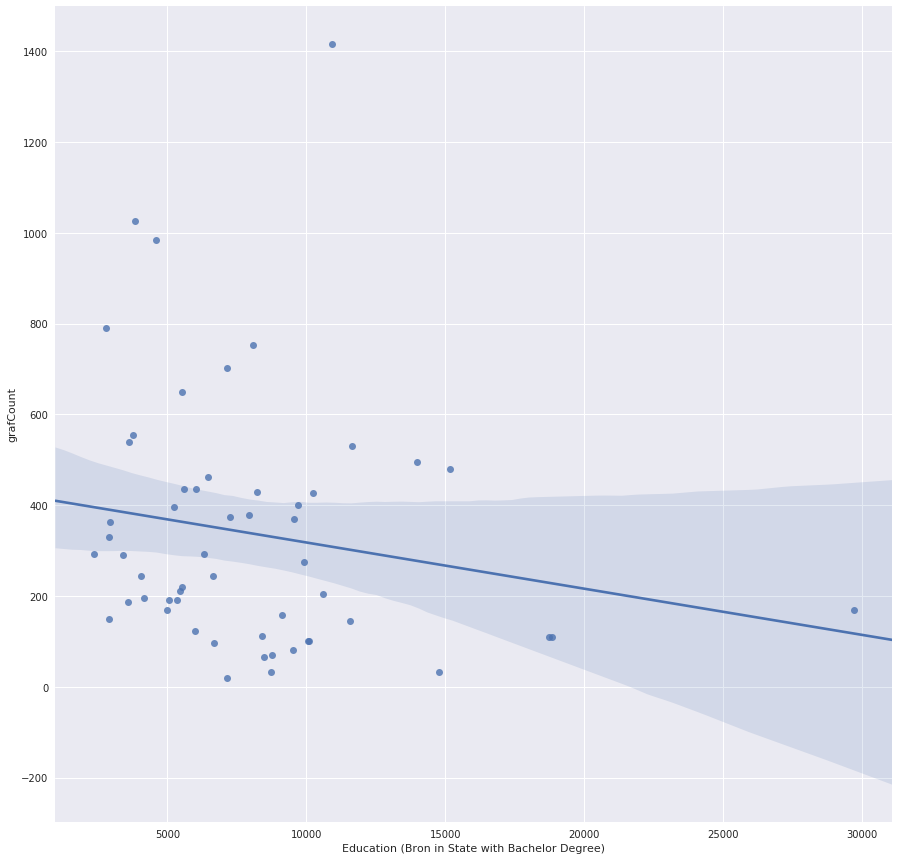

In [130]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)

sns.regplot(x="Edu", y="grafCount", data=df_norm,ax = ax);

ax.set_ylabel("grafCount")
ax.set_xlabel("Education (Bron in State with Bachelor Degree)")

**Figure 5-5: These plots show the ols fit model with grafCount and Education level(born in state with a bachler degree) , which I can see week negative correlation result .**

## Conclusion

Based on the analysis above, we cannot see significant correlation between graffiti complaints from 311 and the unemployment rate and crime(relative to Bulgury and theft) in that location, However, the education level have week negative correlation with Graffiti complaints. 

#### Part2

In [131]:
from pandas.tools.plotting import lag_plot
from pandas.tools.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AR
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [132]:
graf.sort_values('year')

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Segment,Latitude,Longitude,Location,startdate,year,month,day,lonlat,geometry
0,15636284,01/01/2010 04:39:20 PM,01/01/2010 04:39:20 PM,DSNY,Department of Sanitation,Graffiti,Graffiti,NaN,11215.0,194 12 STREET,...,NaN,40.668958,-73.991103,"(40.668958142504884, -73.99110341884311)",2010-01-01 16:39:20,2010,1,1,"(-73.9911034188, 40.6689581425)",POINT (-73.99110341884311 40.66895814250488)
13894,18285099,07/17/2010 08:39:26 AM,09/03/2010 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Comercial,10454.0,357 EAST 145 STREET,...,NaN,40.814035,-73.920865,"(40.81403529642619, -73.92086529676028)",2010-07-17 08:39:26,2010,7,17,"(-73.9208652968, 40.8140352964)",POINT (-73.92086529676028 40.81403529642618)
13893,18285098,07/17/2010 08:39:25 AM,11/10/2010 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,11206.0,44 JEFFERSON STREET,...,NaN,40.698596,-73.933340,"(40.69859644281985, -73.93333973798654)",2010-07-17 08:39:25,2010,7,17,"(-73.933339738, 40.6985964428)",POINT (-73.93333973798654 40.69859644281986)
13892,18285097,07/17/2010 08:39:23 AM,09/21/2010 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,10029.0,2129 2 AVENUE,...,NaN,40.792894,-73.940793,"(40.792893648408665, -73.94079332313342)",2010-07-17 08:39:23,2010,7,17,"(-73.9407933231, 40.7928936484)",POINT (-73.94079332313342 40.79289364840866)
13891,18285096,07/17/2010 08:39:23 AM,09/21/2010 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Residential,10029.0,245 EAST 110 STREET,...,NaN,40.793704,-73.941768,"(40.79370384030104, -73.94176771541716)",2010-07-17 08:39:23,2010,7,17,"(-73.9417677154, 40.7937038403)",POINT (-73.94176771541716 40.79370384030103)
13890,18285095,07/17/2010 08:39:22 AM,09/01/2010 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Residential,11385.0,1630 NORMAN STREET,...,NaN,40.695832,-73.902509,"(40.695832432983984, -73.90250925058596)",2010-07-17 08:39:22,2010,7,17,"(-73.9025092506, 40.695832433)",POINT (-73.90250925058595 40.69583243298398)
13889,18285094,07/17/2010 08:39:21 AM,08/05/2010 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,11435.0,143-01 HILLSIDE AVENUE,...,NaN,40.704919,-73.812652,"(40.70491897141031, -73.81265249075862)",2010-07-17 08:39:21,2010,7,17,"(-73.8126524908, 40.7049189714)",POINT (-73.81265249075862 40.70491897141032)
13888,18285093,07/17/2010 08:39:19 AM,08/16/2010 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,10030.0,100 WEST 142 STREET,...,NaN,40.818591,-73.937837,"(40.818590952885884, -73.93783680241513)",2010-07-17 08:39:19,2010,7,17,"(-73.9378368024, 40.8185909529)",POINT (-73.93783680241512 40.81859095288589)
13895,18285100,07/17/2010 08:39:27 AM,01/11/2012 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,10454.0,317 ALEXANDER AVENUE,...,NaN,40.811800,-73.923870,"(40.811800370883205, -73.92386995124593)",2010-07-17 08:39:27,2010,7,17,"(-73.9238699512, 40.8118003709)",POINT (-73.92386995124593 40.81180037088321)
13887,18285092,07/17/2010 08:39:19 AM,09/23/2010 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,10030.0,300 WEST 142 STREET,...,NaN,40.820993,-73.943521,"(40.82099276164245, -73.94352143653646)",2010-07-17 08:39:19,2010,7,17,"(-73.9435214365, 40.8209927616)",POINT (-73.94352143653646 40.82099276164245)


In [133]:
# create the duration feature
# 1. 
graf = graf[~graf['Closed Date'].isnull()]
graf = graf.reset_index()

In [134]:
sorted([graf['Closed Date'][i].split(' ')[0].split('/')[-1] for i in range(len(graf['Closed Date']))],reverse = True)

['3027',
 '2201',
 '2201',
 '2201',
 '2201',
 '2100',
 '2047',
 '2047',
 '2023',
 '2019',
 '2019',
 '2019',
 '2019',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 

In [135]:
graf.shape

(125605, 45)

** we see some outliners of the closed date, which is outside the year between 2010-2018 **

In [136]:
graf['closedyear'] = [graf['Closed Date'][i].split(' ')[0].split('/')[-1] for i in range(len(graf['Closed Date']))]
graf['closedyear'] = graf['closedyear'].astype(int)

In [137]:
graf = graf[(graf['closedyear']>2009)&(graf['closedyear']<2019)]
graf['closedate'] = pd.to_datetime(graf['Closed Date'])

In [138]:
graf.shape

(125589, 47)

In [139]:
graf['duration'] = (graf['closedate']-graf['startdate']).dt.days

In [140]:
type(graf['duration'][0])

numpy.int64

In [141]:
sorted(graf['duration'],reverse = True)[-10:] # we found out the negative numbers which we need to filter them out

[-683, -709, -710, -711, -716, -716, -717, -723, -723, -1069]

In [142]:
(graf['duration']>=0).sum()

124892

In [143]:
graf = graf[graf['duration']>=0]
graf.shape

(124892, 48)

In [144]:
graf.head()

,index,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,...,Location,startdate,year,month,day,lonlat,geometry,closedyear,closedate,duration
0,0,15636284,01/01/2010 04:39:20 PM,01/01/2010 04:39:20 PM,DSNY,Department of Sanitation,Graffiti,Graffiti,NaN,11215.0,...,"(40.668958142504884, -73.99110341884311)",2010-01-01 16:39:20,2010,1,1,"(-73.9911034188, 40.6689581425)",POINT (-73.99110341884311 40.66895814250488),2010,2010-01-01 16:39:20,0
1,1,15636303,01/01/2010 05:26:37 PM,06/30/2010 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,10033.0,...,"(40.84444801315609, -73.93621512605705)",2010-01-01 17:26:37,2010,1,1,"(-73.9362151261, 40.8444480132)",POINT (-73.93621512605705 40.8444480131561),2010,2010-06-30 00:00:00,179
2,2,15636304,01/01/2010 05:37:18 PM,01/26/2010 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,10467.0,...,"(40.87648037643658, -73.8746649374504)",2010-01-01 17:37:18,2010,1,1,"(-73.8746649375, 40.8764803764)",POINT (-73.8746649374504 40.87648037643658),2010,2010-01-26 00:00:00,24
3,3,15636305,01/01/2010 05:59:13 PM,07/28/2010 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,10032.0,...,"(40.839364876845416, -73.94151452115523)",2010-01-01 17:59:13,2010,1,1,"(-73.9415145212, 40.8393648768)",POINT (-73.94151452115523 40.83936487684542),2010,2010-07-28 00:00:00,207
4,4,15636306,01/01/2010 06:00:09 PM,06/30/2010 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,10032.0,...,"(40.839364876845416, -73.94151452115523)",2010-01-01 18:00:09,2010,1,1,"(-73.9415145212, 40.8393648768)",POINT (-73.94151452115523 40.83936487684542),2010,2010-06-30 00:00:00,179


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


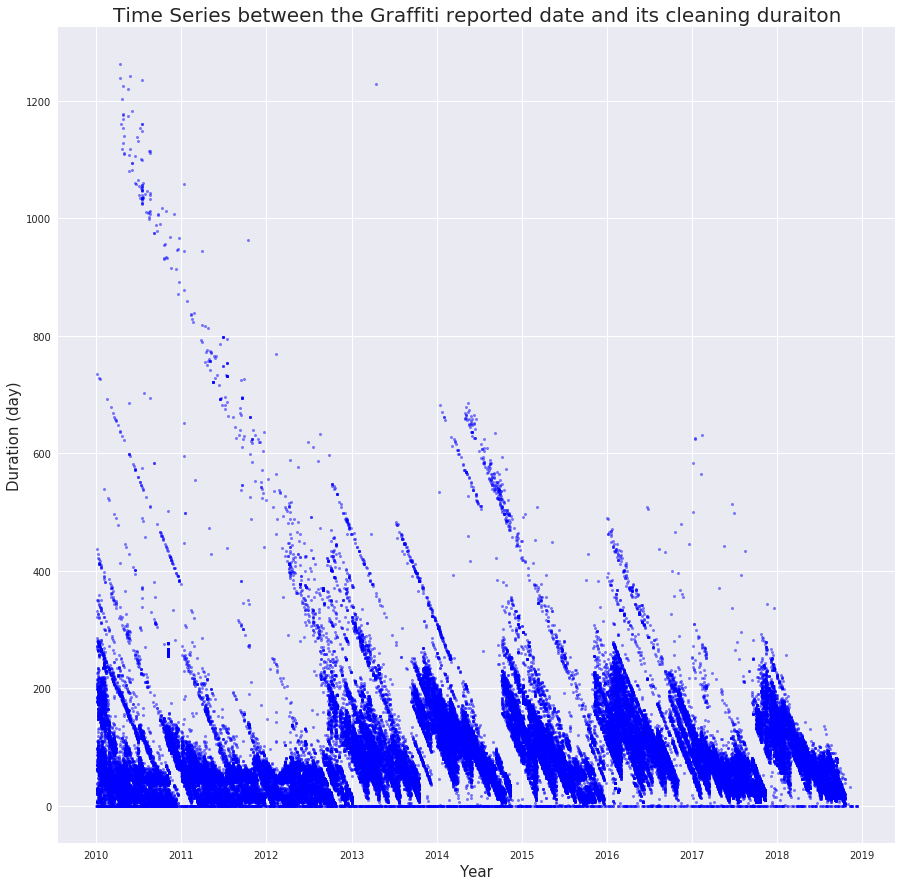

In [145]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)
ax.plot(graf['startdate'],graf['duration'],'bo',markersize=3,alpha = 0.5)
ax.set_xlabel('Year',fontsize = 15)
ax.set_ylabel('Duration (day)',fontsize = 15)
ax.set_title('Time Series between the Graffiti reported date and its cleaning duraiton',fontsize = 20)
plt.show()

**Figure 6: This scatter plot show the time series between the 311 graffiti complaints create between (2010 -2018) and their cleaning duration time. we can see a clear visual trend  .**

In [146]:
graf.crs = from_epsg(4326)

In [147]:
graf.to_crs(epsg=2263,inplace = True)

In [148]:
graf.crs

{'init': 'epsg:2263', 'no_defs': True}

In [149]:
# fig = plt.figure(figsize = (15,15))
# ax = fig.add_subplot(111)
# pumadata.plot(ax=ax,color = 'white',edgecolor = 'black',lw = 1)
# graf[graf['duration']>60].plot(ax=ax,column = 'duration',cmap = 'autumn',markersize = graf['duration']/10,alpha=0.1)


In [150]:
graf['weeknum'] = graf['startdate'].dt.week

In [151]:
# I need to divide the dataframe from 2010 to 2017 (without 2018 because year2018 is not complete yet)
grafAll = [graf[graf['year']==i] for i in range(2010,2018)]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


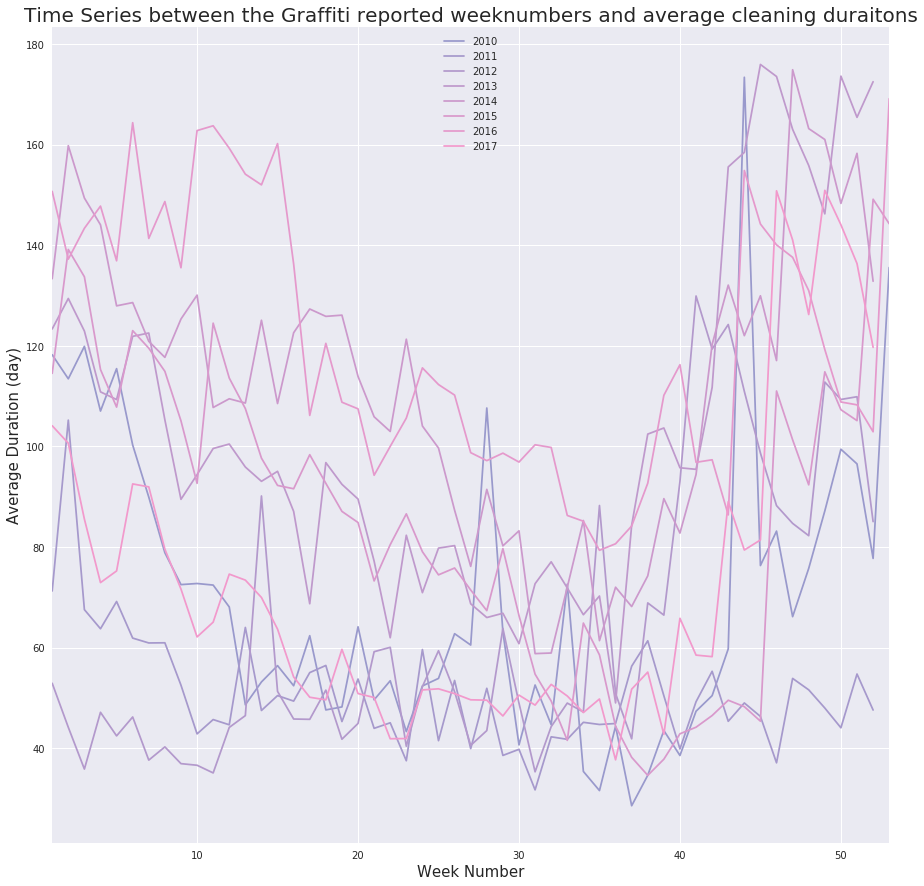

In [152]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)
for i in range(len(grafAll)):
    grafAll[i][['weeknum','duration']].groupby('weeknum')['duration'].mean().plot(ax = ax,label = str(2010+i),color = (i/20+0.6,0.6, 0.8, 1))
ax.set_xlabel('Week Number',fontsize = 15)
ax.set_ylabel('Average Duration (day)',fontsize = 15)
ax.set_title('Time Series between the Graffiti reported weeknumbers and average cleaning duraitons',fontsize = 20)
ax.legend()
plt.show()
  

**Figure 7: 'Time Series between the Graffiti reported weeknumber and its average cleaning duraiton for each year(2010-2017). we can see a clear visual trend and it looks like there are difference between of the start and end of the year.**

In [153]:
graf_ts = pd.DataFrame(graf[['duration','weeknum']].groupby('weeknum',as_index = False)['duration'].mean())

In [154]:
graf_ts.index = graf_ts.weeknum

In [155]:
graf_ts.drop('weeknum',axis = 1,inplace = True);graf_ts.head()

,duration
weeknum,
1,111.266003
2,121.525330
3,116.897378
4,111.005618
5,108.266055


In [156]:
# Timeseries and AR model (from my ADS homework4)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


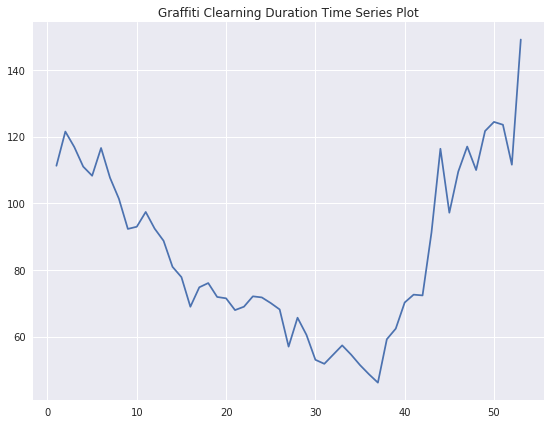

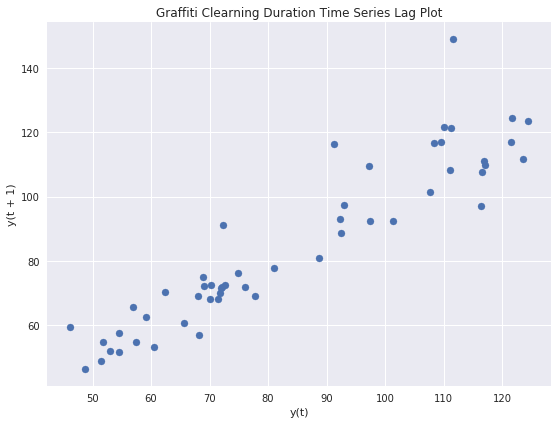

In [157]:
duration_ts= graf_ts[['duration']]
duration_ts.name = 'Graffiti Clearning Duration Time Series'

def time_series_plotting(func, series):
    """
    takes time series data and plots, based on a give function
    """
    fig, ax = plt.subplots(2, figsize=(15,6))

    plt.subplot(121)

    func(series)
    plt.title('{} {}'.format(series.name, func.__name__).replace('_', ' ').title())



    plt.tight_layout()
    plt.show()

time_series_plotting(plt.plot, duration_ts)
time_series_plotting(lag_plot, duration_ts)

**Figure 8: 1. Time Series between the Graffiti reported weeknumber and its average cleaning duraiton for the 7 years (2010-2017). we can see in summer it usually take shorter time to clean the graffiti and the winter it take longer more than 3months  2. the lag plot show there are significant positive correlation for the timeseries about weeks number and cleaning duraion.
**

trainset length is 46

Graffiti Clearning Duration Time Series
Lag: 10
Test_Active MSE: 278.813



/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


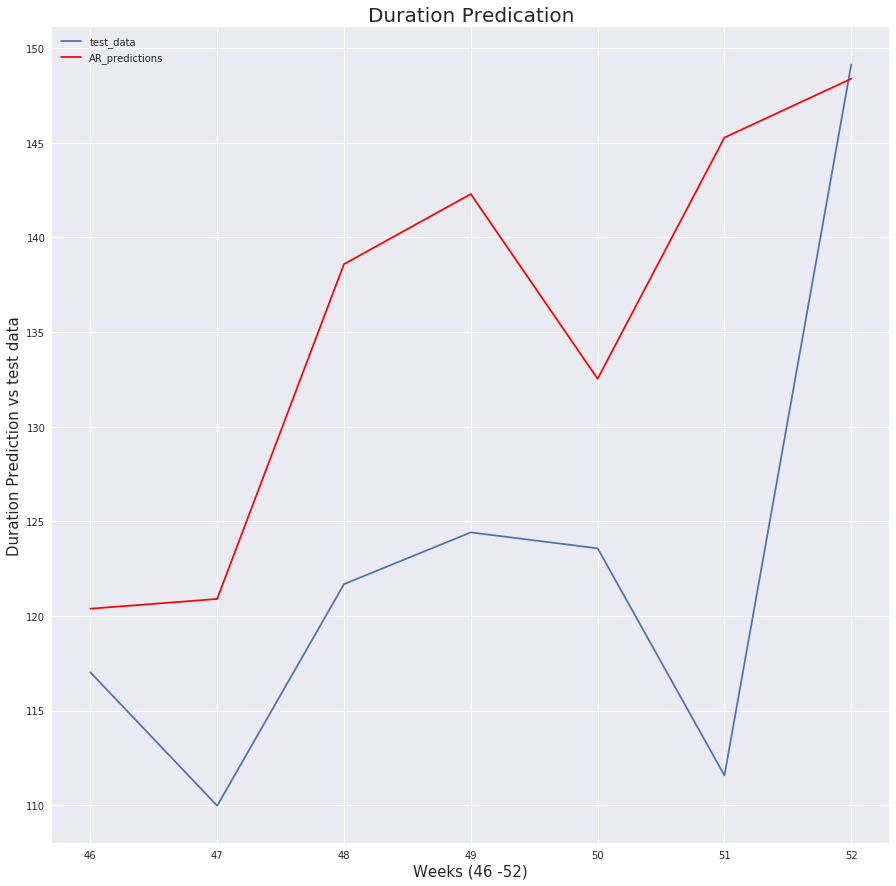

In [158]:
from statsmodels.tsa.ar_model import AR
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.ar_model.AR.html
from sklearn.metrics import mean_squared_error
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
# https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/ For the bese MSE

d = 7
def fit_AR1(series):
    # split into train and test sets
    vals = series.values

    print('trainset length is {}'.format(len(vals)-d))
    print()
    train, test = vals[0:len(vals)-d], vals[len(vals)-d:]



    model = AR(train)
    model_fit = model.fit()
    print(series.name)
    
    # walk-forward validataion
    print('Lag: %s' % model_fit.k_ar)
    predictions = model_fit.predict(start = len(train),end = len(vals)-1,dynamic = False)
    for i in range(len(predictions)):
        #print('predicted=%f, expected=%f' % (predictions[i], test[i]))
        error = mean_squared_error(test,predictions)
    print('Test_Active MSE: %.3f' % error)
    return test, predictions

t1, p1 = fit_AR1(duration_ts)
print()


fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)

xticks = range(len(duration_ts)-d,len(duration_ts))
ax.plot(xticks,t1, label='test_data')
ax.plot(xticks,p1, color='red', label='AR_predictions')

plt.xticks(xticks)
ax.set_xlabel('Weeks (46 -52)',fontsize = 15)
ax.set_ylabel('Duration Prediction vs test data',fontsize = 15)
plt.title('Duration Predication',fontsize = 20)
plt.legend()


plt.show()

**Figure 9: I use the Autoregressive Model AR(1) to predict the duraion by week number. I split the weeknumber of first 46 as training and the last6 week as testing, I got the Mean Square Error is around 256, such .**

In [159]:
duration_ts.head()

,duration
weeknum,
1,111.266003
2,121.525330
3,116.897378
4,111.005618
5,108.266055


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


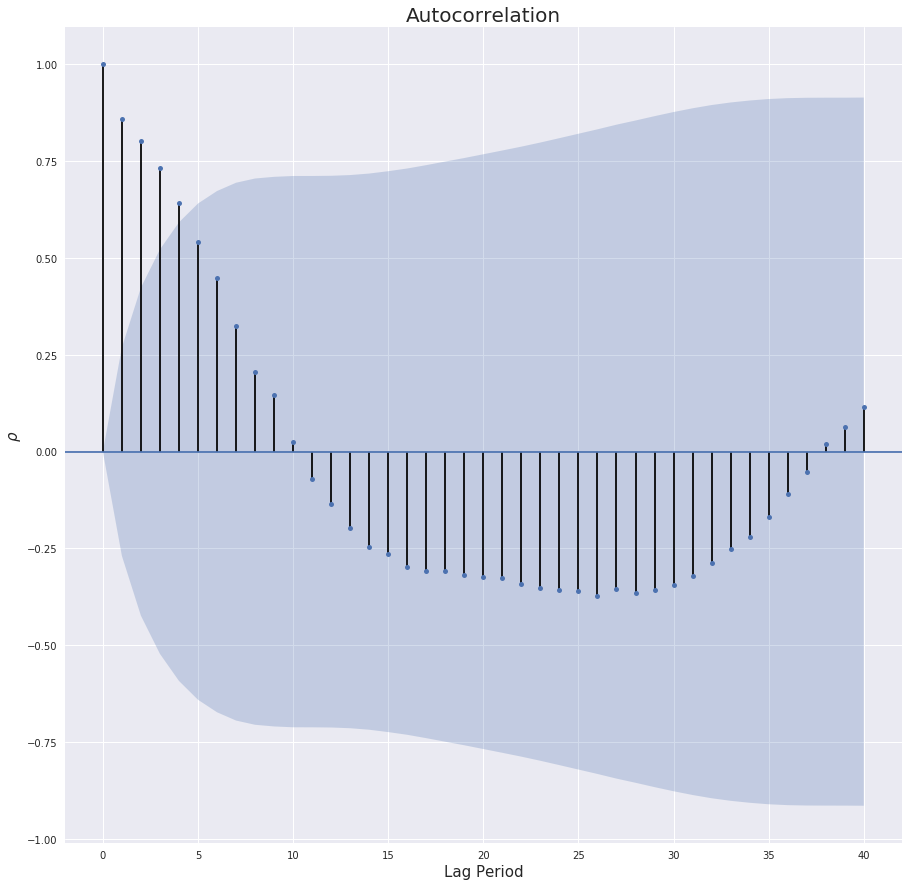

In [160]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)
import statsmodels.api as sma

sma.graphics.tsa.plot_acf(duration_ts['duration'].squeeze(), lags=40,ax = ax)
ax.set_xlabel('Lag Period',fontsize = 15)
ax.set_ylabel(r'$\rho$',fontsize = 15)
plt.title('Autocorrelation',fontsize = 20)
plt.legend()

**Figure 10: I run a autocorrelation plot with lag value along the x-axis and the correlation on the y-axis between -1 and 1. The Blue Cone area is the confidence intervals. It is by default the set to a 95% confidence interval. Now we can see at the lag of 5 we can see the model fall into the confidence interval.**